In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime

In [13]:
def parser(x):
    return datetime.strptime(x,"%Y-%m")

sales=pd.read_csv("C:/Users/user/Downloads/cars.csv",index_col=0,parse_dates=[0],date_parser=parser)


In [14]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [16]:
sales_diff=sales.diff(periods=1)

In [17]:
sales_diff=sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


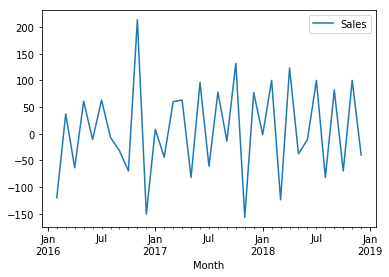

In [18]:
sales_diff.plot()

In [19]:
from statsmodels.tsa.ar_model import AR

In [20]:
train=sales_diff[0:28]
test=sales_diff[28:]
test.count()

Sales    7
dtype: int64

In [21]:
m=AR(train)
md=m.fit()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [22]:
p=md.predict(start=28,end=36)

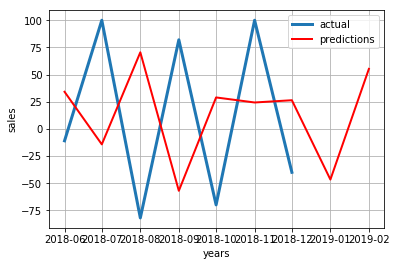

In [23]:
plt.plot(test,label="actual",linewidth=3)
plt.plot(p,color="red",label="predictions",Linewidth=2)
plt.xlabel("years")
plt.ylabel("sales")
plt.grid()
plt.legend()

# ARIMA MODEL

In [24]:
from statsmodels.tsa.arima_model import ARIMA
arima=ARIMA(train,order=(4,1,0))
arima_fit=arima.fit()
print(arima_fit.aic)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


317.55247878712964


In [25]:
predict=arima_fit.forecast(steps=7)[0]
predict

array([ 88.36964656, -59.91141746,  79.76542926,   0.25890693,
        52.83940084,  -5.4368258 ,  50.4315147 ])

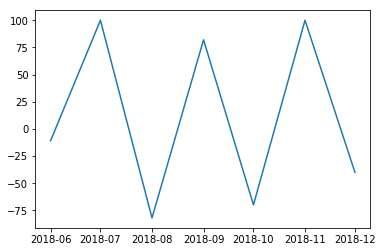

In [26]:
plt.plot(test)


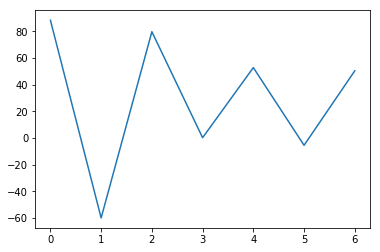

In [27]:
plt.plot(predict)


In [28]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))

In [32]:
import warnings
warnings.filterwarnings("ignore")
for params in pdq:
    try:
        arima=ARIMA(train,order=params)
        arima_fit=arima.fit()
        print(arima_fit.aic)
    except:
        continue

335.48199299103834
318.32773781408133
316.9247336713505
356.4887261123718
329.63406184199255
377.1155514266226
349.59209383464986
319.7038302947886
317.09179718922235
320.1097894495466
321.9757836130158
319.33747666350814
328.9753884514163
341.6569189764411
320.89746785456515
319.4447164869589
320.31856979909264
323.28244118912943
321.10488276804847
328.234436528321
338.7499548037174
315.47072015173495
316.9140303142073
315.5010142342101
317.320777018915
322.78621362392374
320.2929606020725
310.0848541943741
310.7894179051377
330.8350094202024
317.447604023373
316.9495282700985
318.9028693514254
317.43624800753474
319.3625895681684
320.767463459003
317.55247878712964
311.10656355028414
311.45294044340665
315.58104805939905
